In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
7,8,Female,23,18,94
116,117,Female,63,65,43
176,177,Male,58,88,15
152,153,Female,44,78,20
129,130,Male,38,71,75


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


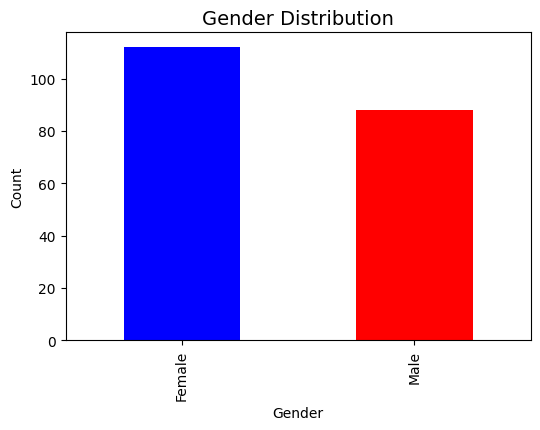

In [9]:
plt.figure(figsize=(6, 4))
pd.Series(df['Gender']).value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [10]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [11]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [12]:
df.drop('CustomerID', axis=1, inplace=True)

In [13]:
df['Gender'] = df['Gender'].map({'Male': 0 , 'Female': 1})

In [15]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,1,45,126,28
114,1,18,65,48
161,1,29,79,83
0,0,19,15,39
121,1,38,67,40


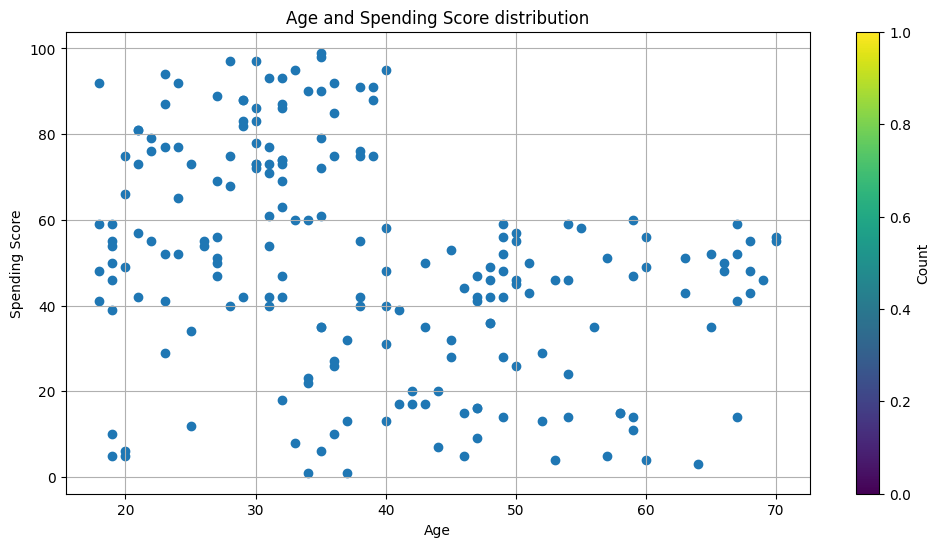

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.colorbar(label='Count')
plt.title('Age and Spending Score distribution')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

In [17]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

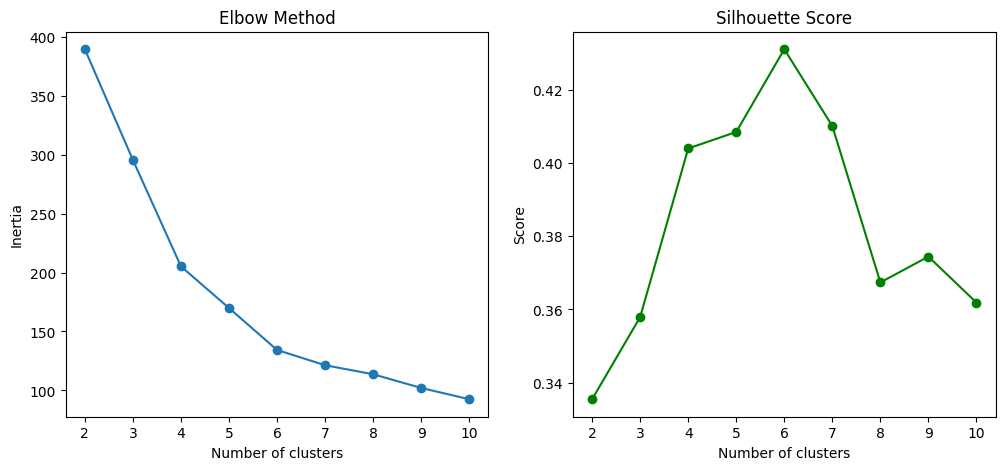

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, model.labels_))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.show()

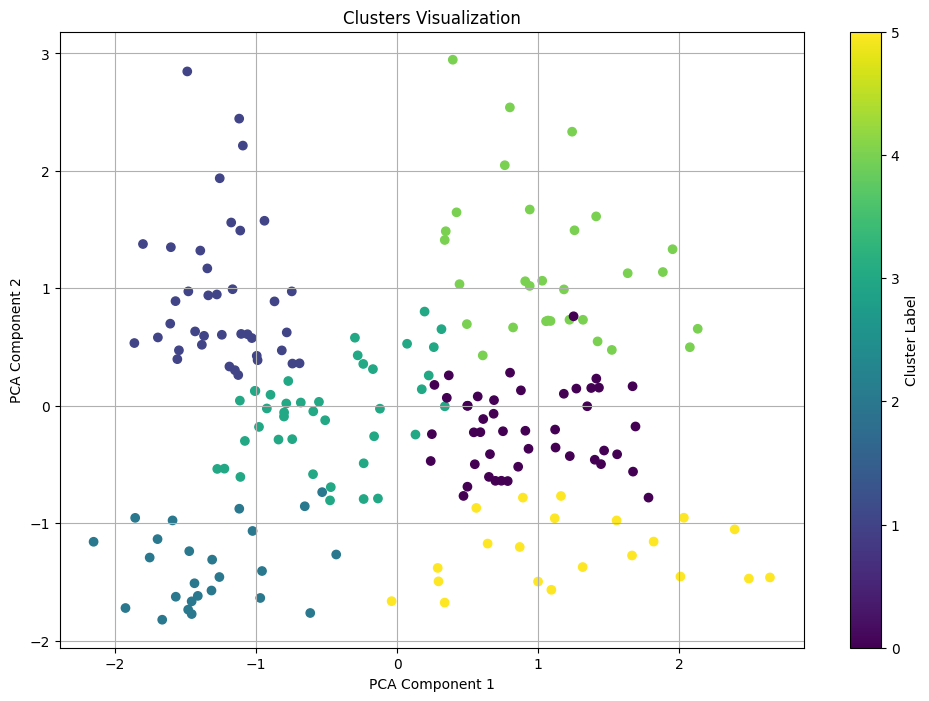

In [30]:
k= 6
model = KMeans(n_clusters=k, random_state=42)
model.fit_predict(X_scaled)

# demensionality reduction for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# visualizing the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=model.labels_, cmap='viridis', alpha=1)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [31]:
cluster_analysis = df.groupby(model.labels_)[features].mean().round(2)
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
     Age  Annual Income (k$)  Spending Score (1-100)
0  56.33               54.27                   49.07
1  32.69               86.54                   82.13
2  25.56               26.48                   76.24
3  26.12               59.42                   44.45
4  44.00               90.13                   17.93
5  45.52               26.29                   19.38


0 : "Mature moderate spenders"

1 : "Wealthy big spenders"

2 : "Young unplanned spenders"

3 : "Young average spenders"

4 : "High income low spenders"

5 : "Low income low spendors"